# Uczenie ze wzmocnieniem (*reinforcement learning*)

## Motywacja

[Solving Rubik’s Cube with a Robot Hand](https://www.youtube.com/watch?v=x4O8pojMF0w)

[Proximal Policy Optimization](https://openai.com/index/openai-baselines-ppo/)

[Multi-Agent Hide and Seek](https://www.youtube.com/watch?v=kopoLzvh5jY)

## Podstawowa terminologia

Głównymi postaciami w uczeniu ze wzmocnieniem (RL) są **agent** i **środowisko** (*environment*). Środowisko to świat, w którym agent żyje i z którym wchodzi w interakcje. W każdym kroku interakcji agent widzi (częściową lub pełną) obserwację stanu świata, a następnie podejmuje decyzję o akcji do wykonania. Środowisko zmienia się, gdy agent na nie oddziałuje, ale może także zmieniać się samoistnie.

Agent otrzymuje również sygnał **nagrody** (*reward*) od środowiska, czyli liczbę, która informuje, jak dobry lub zły jest obecny stan świata (lub jak dobra/zła była podjęta akcja agenta, obie interpretacje są równoważne). Celem agenta jest maksymalizacja jego skumulowanej nagrody, zwanej **zwrotem** (*return*). Metody uczenia ze wzmocnieniem są algorytmami, które uczą agenty zachowań, które pozwalają im osiągać własne cele.

Aby dokładniej omówić, co robi RL, musimy wprowadzić dodatkową terminologię:

- stany i obserwacje (*states and observations*),
- przestrzenie akcji (*action spaces*),
- polityki/strategie (*policies*),
- trajektorie/epizody (*trajectories/episodes*),
- różne sposoby definiowania zwrotu,
- problem optymalizacji RL,
- oraz funkcje wartości (*value functions*).


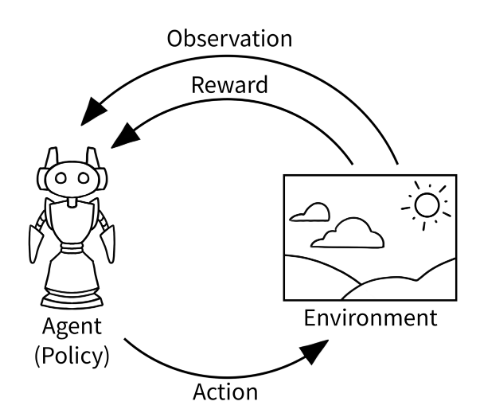

*Pętla interakcji agenta ze środowiskiem*

## Stan i obserwacja

**Stan** \(s\) to pełny opis stanu świata. Nie ma żadnych informacji o świecie, które są ukryte. **Obserwacja** \(o\) to częściowy opis stanu, który może pomijać pewne informacje.

W "deep" RL niemal zawsze reprezentujemy stany i obserwacje jako wektor rzeczywisty, macierz lub tensor. Na przykład obserwacja wizualna może być reprezentowana przez macierz RGB wartości pikseli; stan robota może być reprezentowany przez jego kąty połączeń i prędkości.

Gdy agent jest w stanie obserwować pełny stan środowiska, mówimy, że środowisko jest **w pełni obserwowalne** (*fully observed*). Gdy agent może zobaczyć tylko częściową obserwację, mówimy, że środowisko jest **częściowo obserwowalne** (*partially observed*).


## Przestrzenie akcji

Różne środowiska pozwalają na różne rodzaje akcji podejmowanych przez agenta. Zbiór wszystkich możliwych akcji w danym środowisku jest nazywany **przestrzenią akcji**. Niektóre środowiska, takie jak Atari i Go, mają **dyskretne przestrzenie akcji** ([discrete action spaces](https://gymnasium.farama.org/environments/toy_text/cliff_walking/)), w których agent ma do dyspozycji tylko skończoną liczbę ruchów. Inne środowiska, takie jak te, w których agent kontroluje robota w fizycznym świecie, mają **ciągłe przestrzenie akcji** ([continuous action spaces](https://www.gymlibrary.dev/environments/classic_control/mountain_car_continuous/)). W ciągłych przestrzeniach akcje są wektorami liczb rzeczywistych.

To rozróżnienie ma znaczące konsekwencje dla metod w "deep" RL. Niektóre rodziny algorytmów mogą być bezpośrednio stosowane tylko w jednym przypadku.


## Strategie

**Strategia** (*policy*) to reguła używana przez agenta do decydowania, jakie akcje podjąć w danym momencie (stanie). Może być deterministyczna (np. wyjście sieci neuronowej), w takim przypadku jest zwykle oznaczana jako μ:

$$
a_t = \mu(s_t),
$$

lub może być stochastyczna, w takim przypadku jest zwykle oznaczana jako $\pi$:

$$
a_t \sim \pi(\cdot | s_t).
$$

Dla danego stanu $ s_t $, strategia agenta $ \pi $ zwróci rozkład prawdopodobieństwa dla możliwych akcji, a $ a_t $ jest próbkowane z tego rozkładu.

Ponieważ strategia jest w zasadzie mózgiem agenta, często zamiast „strategia” używa się słowa „agent”, na przykład mówiąc „Strategia stara się maksymalizować nagrodę.”

W głębokim RL mamy do czynienia ze **strategiami parametryzowanymi**, których wyjścia są funkcjami obliczalnymi zależnymi od zestawu parametrów (np. wag sieci neuronowej), które możemy dostosować, aby zmienić zachowanie agenta.

Często oznaczamy parametry takiej strategii jako $\theta$ lub $\phi$, a następnie zapisujemy je jako indeks przy symbolu strategii, aby podkreślić to powiązanie:

$$
a_t = \mu_\theta(s_t)
$$
$$
a_t \sim \pi_\theta(\cdot | s_t).
$$


### Strategie stochastyczne

Dwa najczęściej spotykane rodzaje strategii stochastycznych w RL to **strategie kategoryczne** ([rozkład wielopunktowy](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wielopunktowy))

```
Move Left: 0.1
Move Right: 0.6
Move Up: 0.2
Move Down: 0.1
```

oraz **strategie diagonalne Gaussa** ([wielowymiarowy rozkład normalny](https://pl.wikipedia.org/wiki/Wielowymiarowy_rozk%C5%82ad_normalny)). Inaczej mówiąc jest to zbiór niezależnych rozkładów normalnych, a strateiga dobiera parametry tychże rozkładów.

```
Policy output: {'mean': array([ 0.5, -0.3]), 'std_dev': array([0.1, 0.2])}

```

Strategie **kategoryczne** mogą być używane w dyskretnych przestrzeniach akcji, podczas gdy diagonalne strategie **Gaussa** są stosowane w ciągłych przestrzeniach akcji.


## Trajektoria

Trajektoria $\tau$ to sekwencja stanów i akcji w świecie,

$$
\tau = (s_0, a_0, s_1, a_1, \dots).
$$

Pierwszy stan świata, $s_0$, jest losowo wybrany z rozkładu stanów początkowych, czasem oznaczanego przez $\rho_0$:

$$
s_0 \sim \rho_0(\cdot).
$$

Przejścia między stanami (to, co dzieje się ze światem pomiędzy stanem w chwili $t$, $s_t$, a stanem w chwili $t + 1$, $s_{t+1}$) są regulowane przez naturalne prawa środowiska (**symulator**) i zależą tylko od ostatniej akcji, $a_t$. Mogą być one deterministyczne,

$$
s_{t+1} = f(s_t, a_t)
$$

lub stochastyczne,

$$
s_{t+1} \sim P(\cdot | s_t, a_t).
$$

Akcje pochodzą od agenta zgodnie z jego strategią.

## Zwrot i nagroda

Funkcja nagrody $\mathcal{R}$ jest kluczowa w uczeniu ze wzmocnieniem. Zależy ona od aktualnego stanu świata, właśnie podjętej akcji i kolejnego stanu świata:

$$
r_t = \mathcal{R}(s_t, a_t, s_{t+1})
$$

chociaż często jest to upraszczane do zależności tylko od bieżącego stanu, $r_t = \mathcal{R}(s_t)$, lub pary stan-akcja $r_t = \mathcal{R}(s_t, a_t)$.

Celem agenta jest maksymalizacja pewnego (często różnie definiowanego) pojęcia skumulowanej nagrody wzdłuż trajektorii oznaczanej jako $\mathcal{R}(\tau)$.

Jednym z rodzajów nagrody jest nagroda o **skończonym horyzoncie czasowym bez dyskontowania** (*finite-horizon undiscounted return*), która jest po prostu sumą nagród uzyskanych w ustalonym oknie kroków:

$$
\mathcal{R}(\tau) = \sum_{t=0}^{T} r_t.
$$

Innym rodzajem nagrody jest nagroda o **nieskończonym horyzoncie czasowym z dyskontowaniem** (*infinite-horizon discounted return*), która jest sumą wszystkich nagród kiedykolwiek uzyskanych przez agenta, ale zdyskontowaną w zależności od tego, jak odległa w czasie była ich realizacja. Ta forma nagrody uwzględnia czynnik dyskontowy $\gamma \in (0, 1)$:

$$
\mathcal{R}(\tau) = \sum_{t=0}^{\infty} \gamma^t r_t.
$$

Dlaczego mielibyśmy stosować czynnik dyskontowy? Czy nie chcemy po prostu uzyskać wszystkich nagród? Tak, ale czynnik dyskontowy jest zarówno intuicyjnie atrakcyjny, jak i matematycznie wygodny. Na poziomie intuicyjnym: pieniądze teraz jest lepsza niż w przyszłości. Matematycznie: suma nagród o nieskończonym horyzoncie czasowym może nie zbiegać się do skończonej wartości i trudno się nią posługiwać w równaniach. Jednak z czynnikiem dyskontowym i w rozsądnych warunkach suma nieskończona zbiega się.


# Problem uczenia ze wzmocnieniem

Niezależnie od wyboru miary zwrotu (czy jest to nieskończony horyzont z dyskontowaniem, czy skończony horyzont bez dyskontowania) i niezależnie od wyboru strategii, celem w RL jest **wybranie takiej strategii , która maksymalizuje oczekiwany zwrot**.

Aby mówić o **oczekiwanym zwrocie**, musimy najpierw omówić rozkłady prawdopodobieństwa trajektorii.

Załóżmy, że zarówno przejścia w środowisku, jak i strategia są stochastyczne. W takim przypadku prawdopodobieństwo wystąpienia trajektorii o długości $T$ wynosi:

$$
P(\tau | \pi) = \rho_0(s_0) \prod_{t=0}^{T-1} P(s_{t+1} | s_t, a_t) \pi(a_t | s_t).
$$

Równanie oblicza prawdopodobieństwo doświadczenia pełnej trajektorii stanów i akcji, mnożąc trzy składniki:

- Prawdopodobieństwo rozpoczęcia w początkowym stanie $s_0$, reprezentowane przez $\rho_0(s_0)$.
- Dla każdego kroku czasowego $t$, prawdopodobieństwo przejścia do kolejnego stanu $s_{t+1}$ przy danym aktualnym stanie $s_t$ i akcji $a_t$, co jest reprezentowane przez $P(s_{t+1} | s_t, a_t)$.
- Dla każdego kroku czasowego $t$, prawdopodobieństwo wybrania akcji $a_t$ w aktualnym stanie $s_t$ zgodnie ze strategią $\pi$, reprezentowane przez $\pi(a_t | s_t)$.

Oczekiwany zwrot (dla dowolnej miary), oznaczany jako $J(\pi)$, wynosi:

$$
J(\pi) = \int_{\tau} P(\tau | \pi) R(\tau) = \mathbb{E}_{\tau \sim \pi} \left[ R(\tau) \right].
$$

To jest funkcja celu, którą staramy się maksymalizować w uczeniu ze wzmocnieniem. Reprezentuje ona oczekiwaną nagrodę strategii $\pi$.
- Całka ta reprezentuje oczekiwaną wartość nagrody dla wszystkich trajektorii $\tau$.
- $P(\tau | \pi)$: Prawdopodobieństwo wystąpienia trajektorii $\tau$ przy strategii $\pi$.
- $R(\tau)$: Skumulowana nagroda dla trajektorii $\tau$.

**Centralny problem optymalizacyjny** w RL można zatem wyrazić jako

$$
\pi^* = \arg \max_{\pi} J(\pi),
$$

gdzie $\pi^*$ jest optymalną strategią.

Inaczej mówiąc, celem uczenia ze wzmocnieniem jest znalezienie strategii $\pi$, która maksymalizuje $J(\pi)$, co oznacza, że chcemy, aby agent osiągnął możliwie najwyższą skumulowaną nagrodę.


# Zadania

## Ćwiczenie 1
**Dane**:
- Przyjmij dwie możliwe trajektorie, $\tau_1$ i $\tau_2$, o następujących wartościach:
  - $P(\tau_1 | \pi) = 0.3$ i $R(\tau_1) = 5$
  - $P(\tau_2 | \pi) = 0.7$ i $R(\tau_2) = 2$
- Strategia $\pi$ jest obecnie ustalona.

**Zadanie 1.1**: Oblicz $J(\pi)$ dla tej strategii, używając wzoru $J(\pi) = \int_{\tau} P(\tau | \pi) R(\tau)$.

**Zadanie 1.2**: Przyjmij nową strategię $\pi'$, gdzie:
  - $P(\tau_1 | \pi') = 0.5$ i $P(\tau_2 | \pi') = 0.5$.
  - Nagrody $R(\tau_1)$ i $R(\tau_2)$ pozostają takie same.

Oblicz $J(\pi')$ i porównaj go z $J(\pi)$. Która strategia jest lepsza?

In [12]:
# rozwiązanie

# Dane:
def P(tau):
    return 0.3 if tau == 1 else 0.7

def R(tau):
    return 5 if tau == 1 else 2

# Zadanie 1.1
J = sum(P(tau) * R(tau) for tau in [1, 2])
print(f'J(pi) = {J}')

# Zadanie 1.2
def P_prime(tau):
    return 0.5

J_prime = sum(P_prime(tau) * R(tau) for tau in [1, 2])
print(f'J(pi\') = {J_prime}')

J(pi) = 2.9
J(pi') = 3.5


Lepszą strategią jest ta, która daje wyższy oczekiwany zwrot w tym przypadku $\pi'$.
Logika jest taka, że strategia, $\pi'$, ma większe prawdopodobieństwo wyboru trajektorii $\tau_1$, która ma wyższą nagrodę niż trajektoria $\tau_2$.

## Ćwiczenie 2

**Dane**:
- Dane jest proste środowisko 2x2 typu grid-world ze stanami $s_0$, $s_1$, $s_2$ i $s_3$.
- Przyjmij strategię $\pi$, gdzie:
  - W $s_0$ agent porusza się w prawo z prawdopodobieństwem 0.6 i w dół z prawdopodobieństwem 0.4.
  - W $s_1$ agent porusza się w dół z prawdopodobieństwem 0.8.
  - W $s_2$ agent porusza się w prawo z prawdopodobieństwem 1.0.
- Stan początkowy $s_0$ ma prawdopodobieństwo $\rho_0(s_0) = 1$.
- Prawdopodobieństwa przejścia $P(s_{t+1} | s_t, a_t) = 1$ (tj. środowisko jest deterministyczne dla uproszczenia).

**Zadanie 2.1**: Oblicz $P(\tau | \pi)$ dla trajektorii $\tau = \{s_0, s_1, s_3\}$ zgodnie z tą strategią $\pi$.

**Zadanie 2.2**: Wyjaśnij słowami, dlaczego $P(\tau | \pi)$ staje się bardzo małe wraz ze wzrostem liczby kroków w trajektorii, szczególnie w bardziej złożonych środowiskach.


In [ ]:
# rozwiązanie

# Dane

'''Środowisko:
+----+----+
| s0 | s1 |
-----------
| s2 | s3 |
+----+----+
'''

policy = {
    "s0": {"right": 0.6, "down": 0.4},
    "s1": {"down": 0.8},
    "s2": {"right": 1.0}
}

def trajectory_probability(policy, trajectory):
    probability = 1.0
    for i in range(len(trajectory) - 1):
        state = trajectory[i]
        next_state = trajectory[i + 1]
        if state == "s0" and next_state == "s1":
            action = "right"
        elif state == "s0" and next_state == "s2":
            action = "down"
        elif state == "s1" and next_state == "s3":
            action = "down"
        elif state == "s2" and next_state == "s3":
            action = "right"
        else:
            return 0.0
        probability *= policy[state].get(action, 0.0) 
    return probability

# Zadanie 2.1
trajectory = ["s0", "s1", "s3"]
probability = trajectory_probability(policy, trajectory)
print(f"P(τ | π) dla trajektorii {trajectory} wynosi: {probability}")  # 0.6 * 0.8 = 0.48

P(τ | π) dla trajektorii ['s0', 's1', 's3'] wynosi: 0.48


Zadanie 2.2

$P(\tau | \pi)$ jest iloczynem prawdopodobieństw kolejnych kroków trajektorii, które są mniejsze od 1. Każdy dodatkowy krok powoduje mnożenie przez kolejne prawdopodobieństwo, zmniejszając wynik.

# Materiały

1. [OpenAI Spinning Up](https://spinningup.openai.com/en/latest/index.html)
2. [UCL Course on RL - David Silver](https://www.davidsilver.uk/teaching/)
3. [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/the-book-2nd.html)